In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)

In [3]:
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
df["group"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans,group
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [5]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0, 0.5, 'petal length')

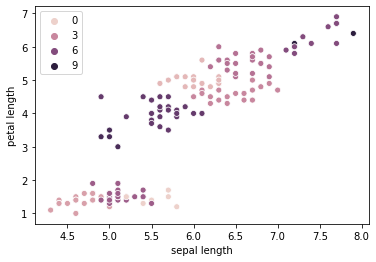

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(df["sepal length (cm)"],
                df["petal length (cm)"],
                hue=cluster.labels_)
plt.xlabel("sepal length")
plt.ylabel("petal length")

In [7]:
from sklearn.metrics import silhouette_score
ks = []
scores = []
for k in range(2, 11):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    ks.append(k)
    scores.append(s)
print(ks)
print(scores)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3557536089245223, 0.3462460703534064, 0.3520039484603334, 0.33112919022123, 0.3410830472337834]


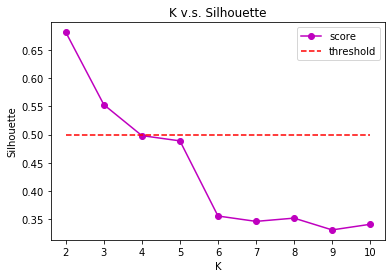

In [17]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
import matplotlib.pyplot as plt
plt.title("K v.s. Silhouette")
plt.xlabel("K")
plt.ylabel("Silhouette")
plot1, = plt.plot(ks, scores, "o-m", label="score")
plot2, = plt.plot(ks, [0.5] * len(ks), "--r", label="threshold")
plt.legend(handles=[plot1, plot2])